# Previsão de compras em E-commerce

Esse conjunto de dados persiste em mais de 12.330 sessões online, o conjunto de dados consiste em 10 atributos numericos e 8 categóricos

In [4]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [11]:
df_original = pd.read_csv('online_shoppers_intention.csv')
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [12]:
df_original.shape

(12330, 18)

In [13]:
df_original.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [14]:
print(df_original.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [15]:
df_original.dropna(inplace= True)

In [16]:
print(df_original.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [17]:
df_original.shape

(12316, 18)

In [18]:
df_original.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [19]:
# Preparando os dados csv para o plot

df = df_original.copy()

# Criando listas vazias para os resultados 
continuous = []
categorial = []

# Entrar em loop pelas colunas 
for c in df.columns[:-1]:
    if df.nunique()[c] >= 30:
        continuous.append(c)
    else:  
        categorial.append(c)    

In [20]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [21]:
df[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [22]:
df[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


### Gráficos para variáveis numéricas

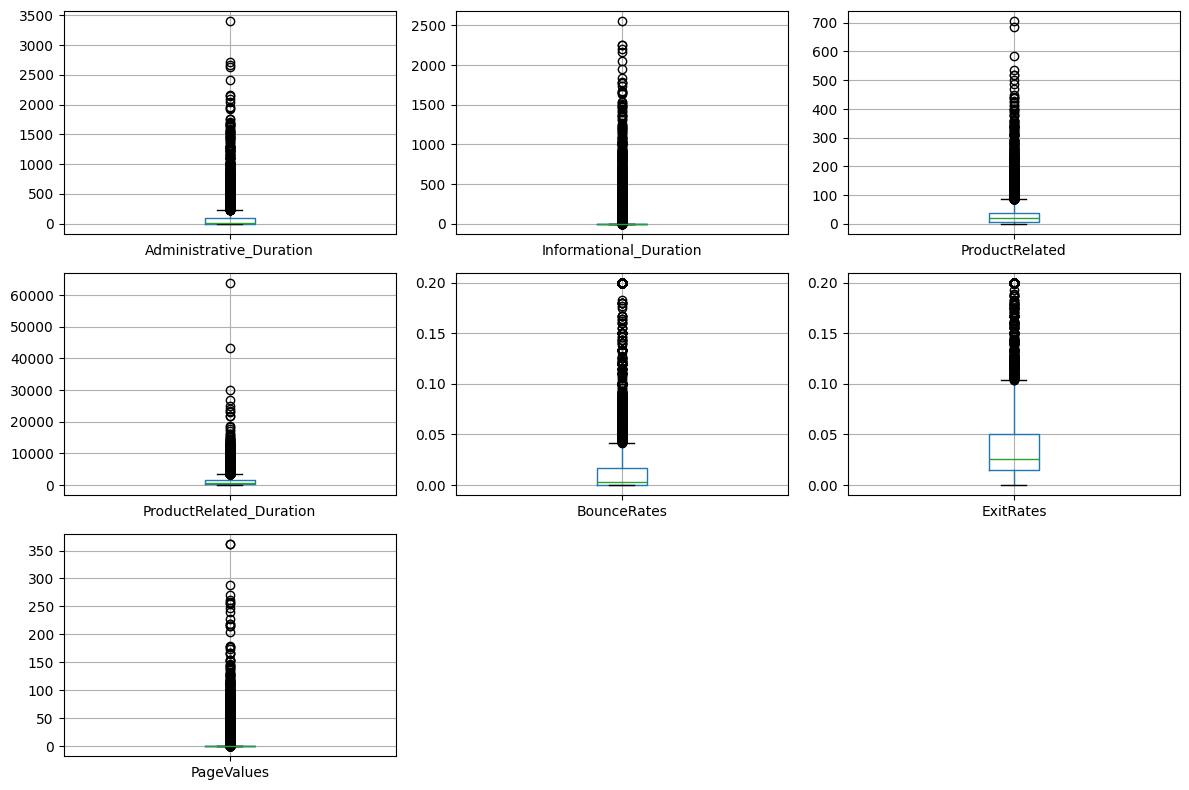

In [23]:
fig = plt.figure(figsize = (12,8))

for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1);
    df.boxplot(col);
    plt.tight_layout()


plt.savefig('boxplot1.png')

imagens parece distorcidas, vamos resolver!

In [24]:
df[continuous] = np.log1p(1 + df[continuous])

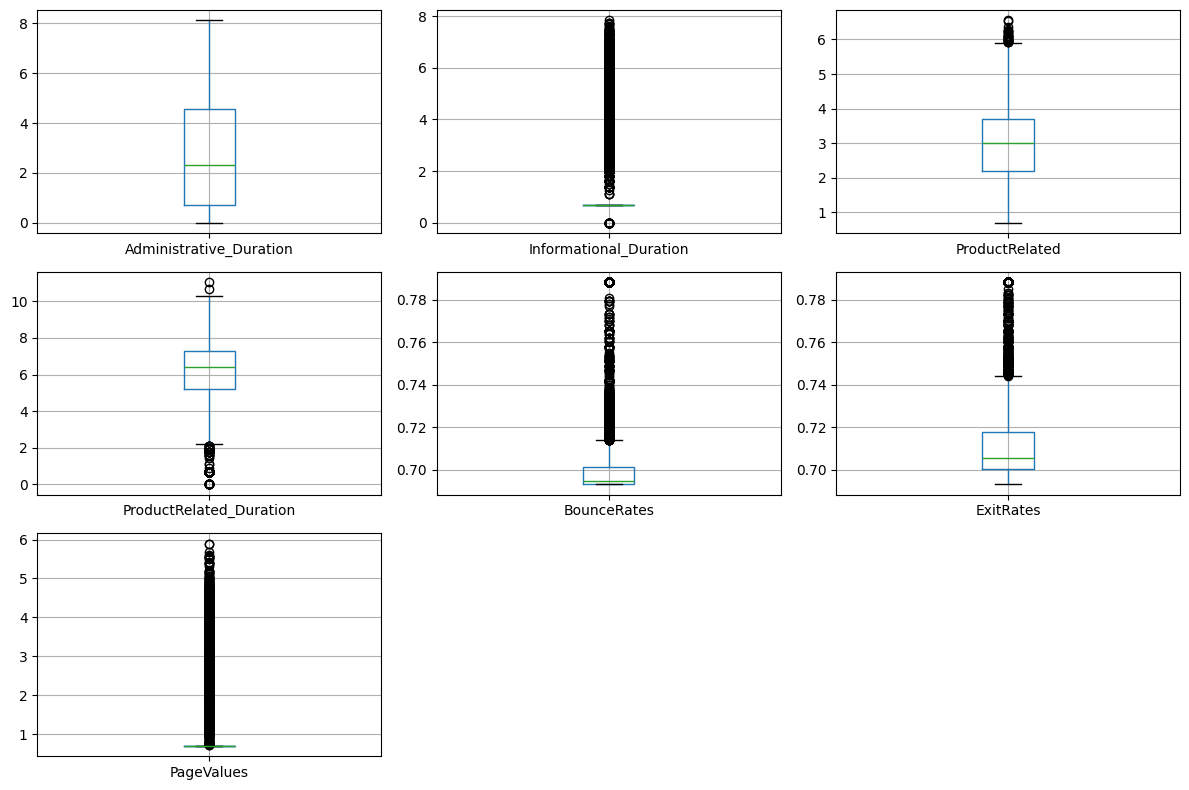

In [25]:
fig = plt.figure(figsize = (12,8))

for i,col in enumerate(continuous):
    plt.subplot(3,3,i+1);
    df.boxplot(col);
    plt.tight_layout()

plt.savefig('boxplot2.png')

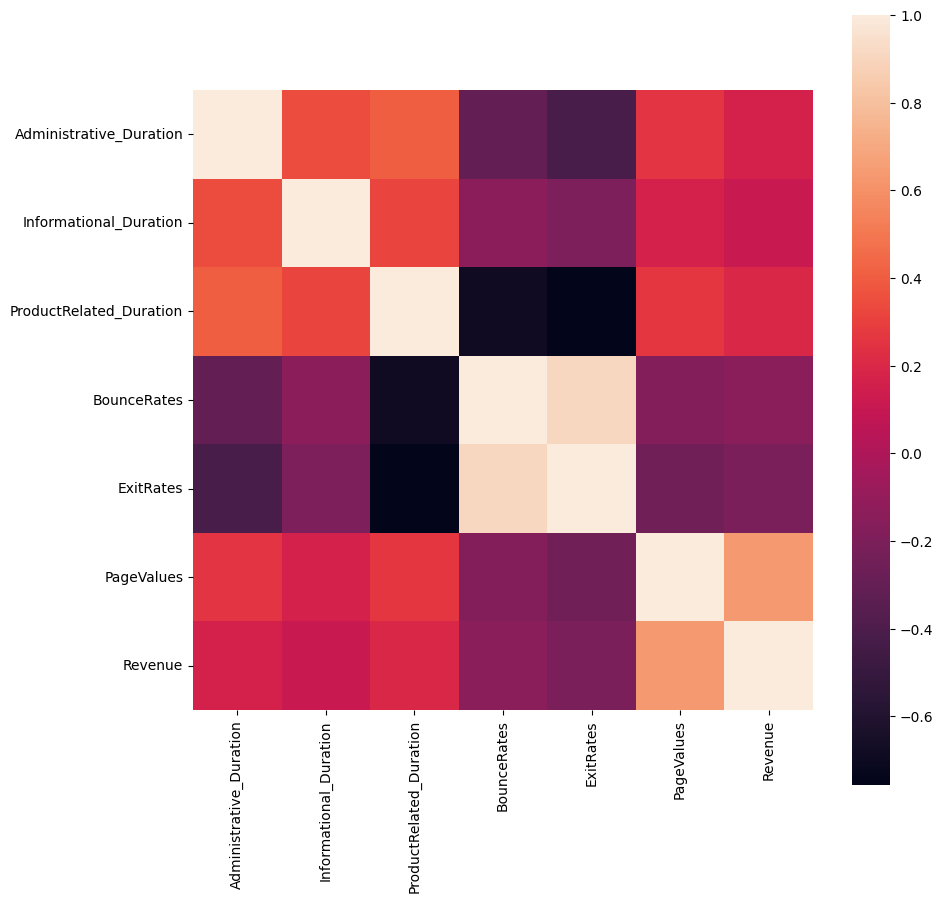

In [26]:
plt.figure(figsize = (10,10))

sns.heatmap(df[['Administrative_Duration',
                 'Informational_Duration', 
                 'ProductRelated_Duration',
                 'BounceRates',
                 'ExitRates',
                 'PageValues',
                 'Revenue']].corr(), vmax = 1., square = True)

plt.show()

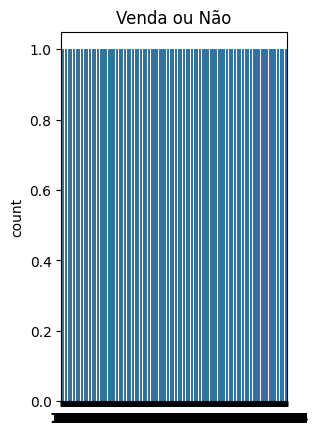

In [27]:
# Counplot de Venda ou Não com warnings fliter

plt.subplot(1, 2, 2)
plt.title("Venda ou Não")
sns.countplot(df['Revenue'])
plt.show()

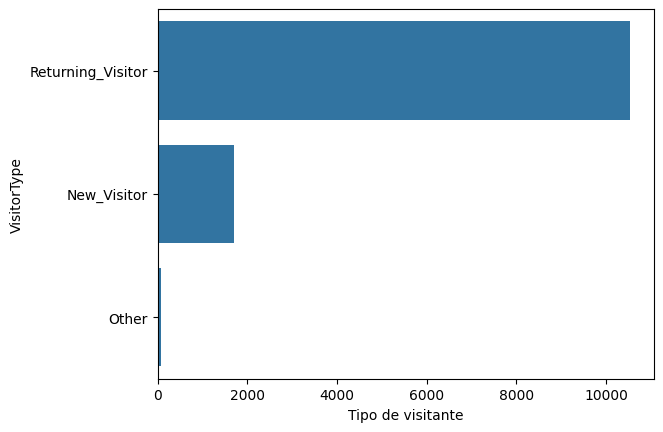

In [28]:
plt.xlabel("Tipo de visitante")
sns.countplot(df['VisitorType'])
plt.show()

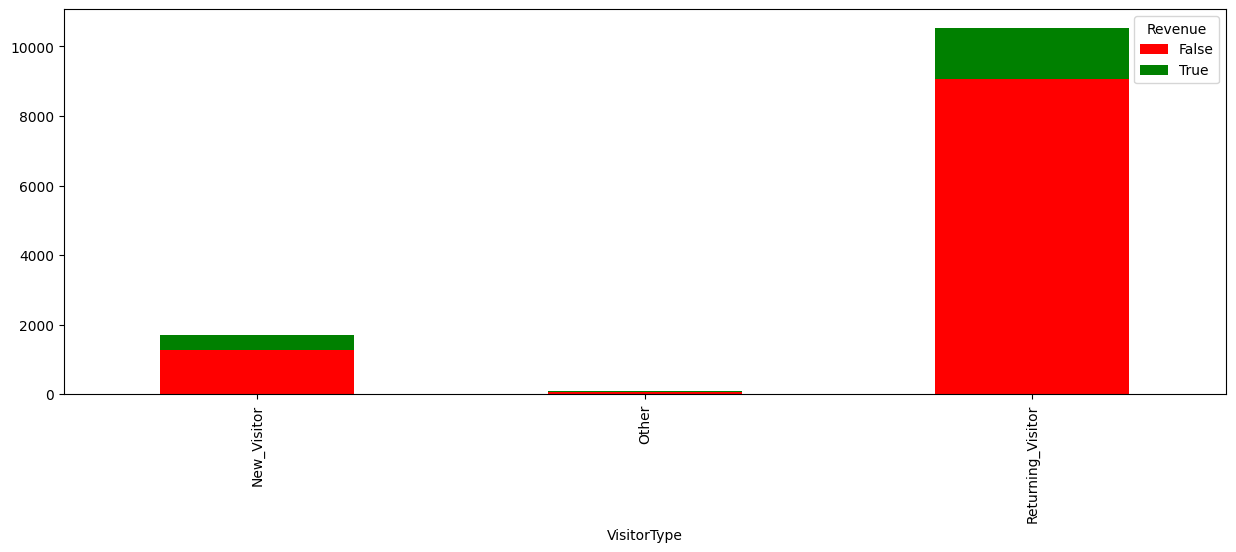

In [29]:
pd.crosstab(df['VisitorType'], df['Revenue']).plot(kind = 'bar',
                                                   stacked = True,
                                                   figsize = (15, 5),
                                                   color = ['red', 'green'])

plt.show()

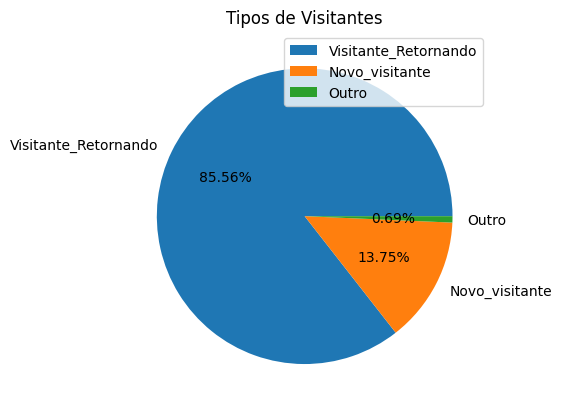

In [30]:
labels = ['Visitante_Retornando', 'Novo_visitante', 'Outro']
plt.title("Tipos de Visitantes")
plt.pie(df['VisitorType'].value_counts(), labels = labels, autopct = '%.2f%%')
plt.legend()

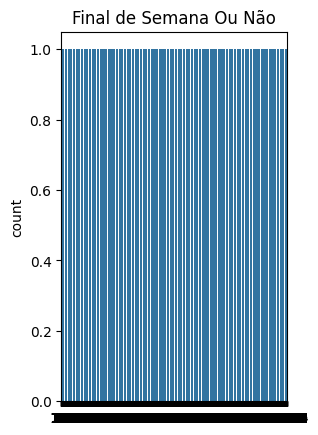

In [31]:
plt.subplot(1, 2, 1)
plt.title("Final de Semana Ou Não")
sns.countplot(df['Weekend'])
plt.show()

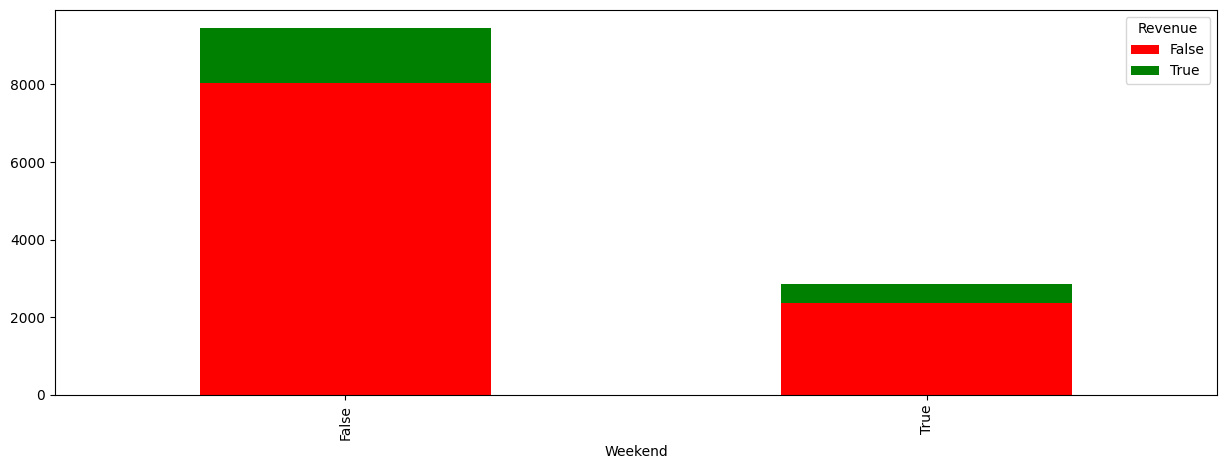

In [32]:
pd.crosstab(df['Weekend'], df['Revenue']).plot(kind = 'bar',
                                               stacked = True,
                                               figsize = (15, 5),
                                               color = ['red', 'green'])

plt.show()

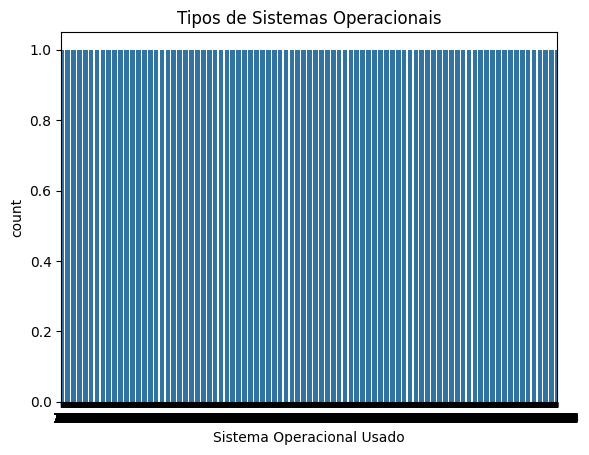

In [33]:
plt.title("Tipos de Sistemas Operacionais")
plt.xlabel("Sistema Operacional Usado")
sns.countplot(df['OperatingSystems'])
plt.show()

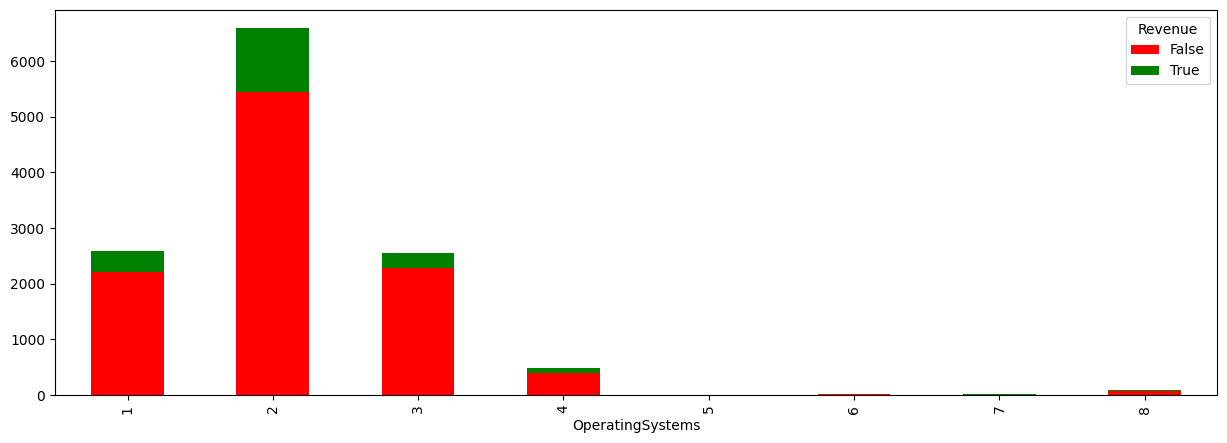

In [34]:
pd.crosstab(df['OperatingSystems'], df['Revenue']).plot(kind = 'bar',
                                               stacked = True,
                                               figsize = (15, 5),
                                               color = ['red', 'green'])

plt.show()

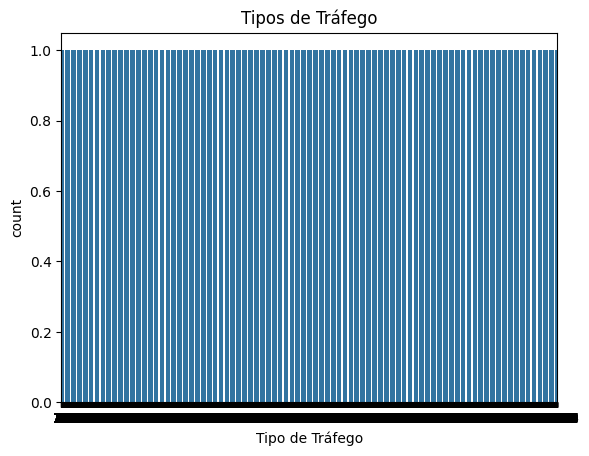

In [35]:
plt.title("Tipos de Tráfego")
plt.xlabel("Tipo de Tráfego")
sns.countplot(df['TrafficType'])

plt.show()

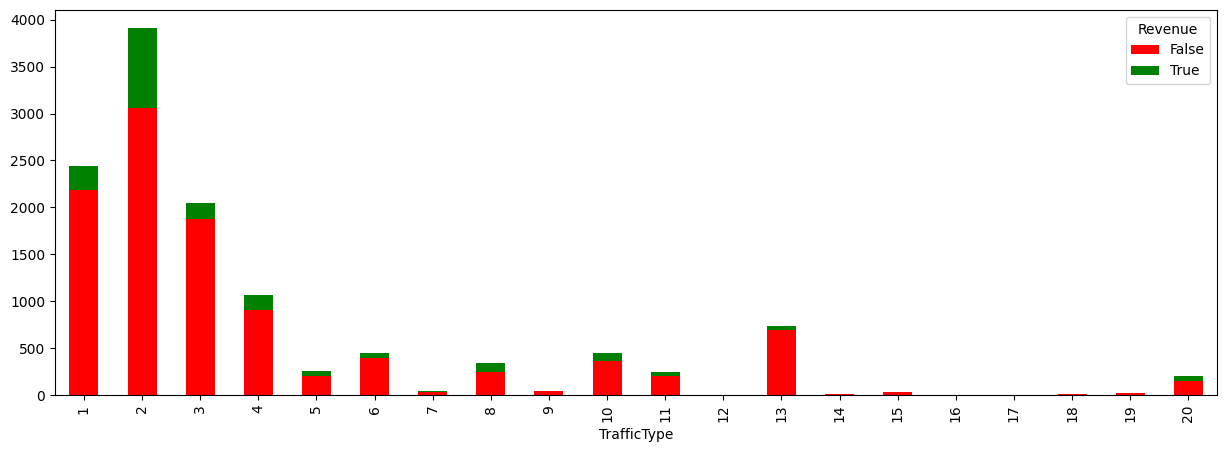

In [36]:
pd.crosstab(df['TrafficType'], df['Revenue']).plot(kind = 'bar',
                                               stacked = True,
                                               figsize = (15, 5),
                                               color = ['red', 'green'])

plt.show()

### Pré Processamento dos Dados aplicados

In [37]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [38]:
lb = LabelEncoder()

df_original['Month'] = lb.fit_transform(df_original['Month'])
df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType'])

df_original.dropna(inplace = True)

In [39]:
df_original.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,2,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,2,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,2,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,2,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,2,False,False


In [40]:
df_original.shape

(12316, 18)

In [41]:
target_count = df_original.Revenue.value_counts()
target_count

Revenue
False    10408
True      1908
Name: count, dtype: int64

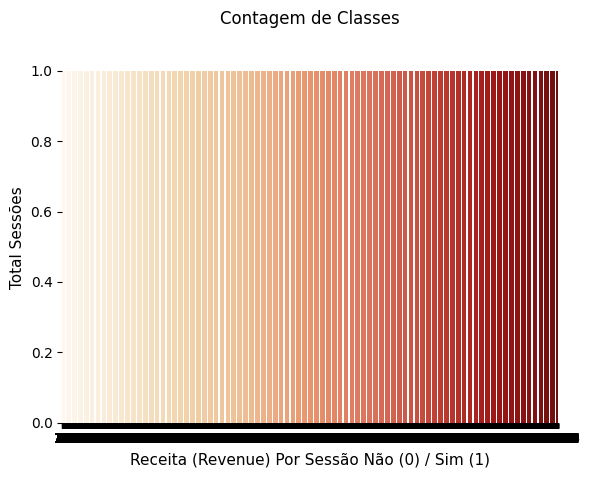

In [42]:
sns.countplot(df_original.Revenue, palette = "OrRd")
plt.box(False)
plt.xlabel('Receita (Revenue) Por Sessão Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [43]:
df_original.shape

(12316, 18)

In [44]:
df_original.iloc[:, 0:17].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True


In [45]:
df_original.iloc[:, 17].head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

Balanceamento de Classe - Oversampling

In [46]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

seed = 100

x = df_original.iloc[:, 0:17]
y = df_original.iloc[:, 17]

smote_bal = SMOTE(random_state= seed)

x_res, y_res = smote_bal.fit_resample(x, y)

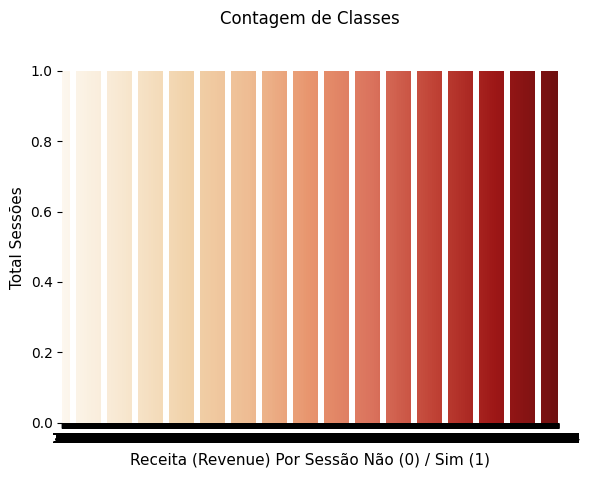

In [47]:
sns.countplot(y_res, palette = "OrRd")
plt.box(False)
plt.xlabel('Receita (Revenue) Por Sessão Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [48]:
df_original.shape

(12316, 18)

In [49]:
df_original.iloc[:, 0:17].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True


In [50]:
df_original.shape

(12316, 18)

In [51]:
x_res.shape

(20816, 17)

In [52]:
y_res.shape

(20816,)

In [53]:
#Ajustar x e y para fins de demonstração

x = x_res
y = y_res

x = x_res.head(1000)
y = y_res.head(1000)

In [54]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Modelo SVM

Modelo Base com Kernel Linear

In [55]:
from sklearn import svm

model_v1 = svm.SVC(kernel='linear')

In [56]:
start = time.time()
model_v1.fit(x_treino, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo: ', end - start)

Tempo de Treinamento do Modelo:  91.09548497200012


In [57]:
previsoes_v1 = model_v1.predict(x_teste)

In [58]:
SVM_dict_v1  = {'Modelo' : 'SVM',
                'versão' : '1',
                'Kernel' : 'Linear',
                'Precision' : precision_score(previsoes_v1, y_teste),
                'Recall' :recall_score(previsoes_v1, y_teste),
                'F1 Score' :f1_score(previsoes_v1, y_teste),
                'Acurácia' : accuracy_score(previsoes_v1, y_teste),
                'AUC' :roc_auc_score(y_teste, previsoes_v1)}

In [59]:
print("Métricas em Teste\n")
SVM_dict_v1

Métricas em Teste



{'Modelo': 'SVM',
 'versão': '1',
 'Kernel': 'Linear',
 'Precision': 0.52,
 'Recall': 0.7647058823529411,
 'F1 Score': 0.6190476190476191,
 'Acurácia': 0.9466666666666667,
 'AUC': 0.7527272727272728}

#podemos ver que a Acurácia do projeto foi concluida com 94 acertos de 100, uma media 94% de acertos nesse modulo

In [60]:
# Vamos deixar os dados na mesma escala padrão

In [61]:
sc = StandardScaler()
x_treino_scaled = sc.fit_transform(x_treino)
x_teste_scaled = sc.fit_transform(x_teste)

In [62]:
# É bom sempre aplicar essa padronização acima logo apos de fazer a divisão entre o treino e teste, exatamente como fizemos aqui

In [63]:
x_treino_scaled

array([[-0.59034343, -0.40561073, -0.31756214, ..., -0.75751167,
         0.33597259, -0.54433105],
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
         0.33597259,  1.83711731],
       [ 0.07887179, -0.33356238, -0.31756214, ..., -0.75751167,
         0.33597259, -0.54433105],
       ...,
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
        -2.97643326, -0.54433105],
       [ 0.07887179, -0.16326629, -0.31756214, ..., -0.41048407,
        -2.97643326,  1.83711731],
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
         0.33597259, -0.54433105]])

In [64]:
x_teste_scaled

array([[ 0.58079027, -0.01210753, -0.27137754, ...,  0.03681882,
         0.31448545, -0.59274898],
       [-0.23914893, -0.23958063, -0.27137754, ..., -0.33136942,
         0.31448545, -0.59274898],
       [ 1.40072947,  1.48352809,  4.16934586, ..., -0.69955767,
         0.31448545, -0.59274898],
       ...,
       [-0.64911853, -0.37859197, -0.27137754, ..., -0.33136942,
         0.31448545, -0.59274898],
       [-0.23914893, -0.38491067, -0.27137754, ...,  0.77319532,
         0.31448545,  1.68705478],
       [-0.64911853, -0.37859197, -0.27137754, ..., -0.69955767,
         0.31448545,  1.68705478]])

In [65]:
model_v2 = svm.SVC(kernel = 'linear')

In [66]:
start = time.time()
model_v2.fit(x_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo: ', end - start)

Tempo de Treinamento do Modelo:  0.037896156311035156


In [84]:
previsoes_v2 = model_v2.predict(x_teste_scaled)

In [83]:
SVM_dict_v2  = {'Modelo' : 'SVM',
                'versão' : '2',
                'Kernel' : 'Linear com Dados Padronizados',
                'Precision' : precision_score(previsoes_v2, y_teste),
                'Recall' :recall_score(previsoes_v2, y_teste),
                'F1 Score' :f1_score(previsoes_v2, y_teste),
                'Acurácia' : accuracy_score(previsoes_v2, y_teste),
                'AUC' :roc_auc_score(y_teste, previsoes_v2)}

In [85]:
print("Metricas em Teste\n")
SVM_dict_v2

Metricas em Teste



{'Modelo': 'SVM',
 'versão': '2',
 'Kernel': 'Linear com Dados Padronizados',
 'Precision': 0.4,
 'Recall': 0.9090909090909091,
 'F1 Score': 0.5555555555555556,
 'Acurácia': 0.9466666666666667,
 'AUC': 0.6981818181818181}

## Otimização de Hiperparametros com Grid Serach e Kernel RBF

In [71]:
model_v3 = svm.SVC(kernel = 'rbf')

C_range = np.array([50, 100, 200.])
gamma_range = np.array([0.3*0.001,0.001,3*0.001])

svm_param_grid = dict(gamma = gamma_range, C = C_range)

start = time.time()
model_v3_grid_search_rbf = GridSearchCV(model_v3, svm_param_grid, cv = 3)

model_v3_grid_search_rbf.fit(x_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search: ', end- start)

print(f"Acurácia em Treinamento: {model_v3_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Hiperparametro Ideais: {model_v3_grid_search_rbf.best_params_}")

Tempo de Treinamento do Modelo com Grid Search:  1.572392225265503
Acurácia em Treinamento: 94.86%

Hiperparametro Ideais: {'C': 50.0, 'gamma': 0.003}


In [72]:
previsoes_v3 = model_v3_grid_search_rbf.predict(x_teste_scaled)

In [74]:
SVM_dict_v3  = {'Modelo' : 'SVM',
                'versão' : '3',
                'Kernel' : 'RBF com Dados Padronizados',
                'Precision' : precision_score(previsoes_v3, y_teste),
                'Recall' :recall_score(previsoes_v3, y_teste),
                'F1 Score' :f1_score(previsoes_v3, y_teste),
                'Acurácia' : accuracy_score(previsoes_v3, y_teste),
                'AUC' :roc_auc_score(y_teste, previsoes_v3)}

In [75]:
print("Métricas em Teste\n")
SVM_dict_v3 

Métricas em Teste



{'Modelo': 'SVM',
 'versão': '3',
 'Kernel': 'RBF com Dados Padronizados',
 'Precision': 0.48,
 'Recall': 0.8571428571428571,
 'F1 Score': 0.6153846153846154,
 'Acurácia': 0.95,
 'AUC': 0.7363636363636362}

## Otimização de Hiperparametros com Grid search e Kernel Polinomial

In [77]:
model_v4 = svm.SVC(kernel = 'poly')

r_range = np.array([0.5, 1])
gamma_range = np.array([0.001, 0.01])
d_range = np.array([2,3, 4])

param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

start = time.time()
model_v4_grid_search_poly = GridSearchCV(model_v4, param_grid_poly, cv = 3)

model_v4_grid_search_poly.fit(x_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search: ', end - start)

print(f"Acurácia em Treinamento: {model_v4_grid_search_poly.best_score_ :.2%}")
print("")
print(f"Hiperparametros Ideais: {model_v4_grid_search_poly.best_params_}")

Tempo de Treinamento do Modelo com Grid Search:  1.0761175155639648
Acurácia em Treinamento: 94.86%

Hiperparametros Ideais: {'coef0': 1.0, 'degree': 3, 'gamma': 0.01}


In [78]:
previsoes_v4 = model_v4_grid_search_poly.predict(x_teste_scaled)

In [79]:
SVM_dict_v4  = {'Modelo' : 'SVM',
                'versão' : '4',
                'Kernel' : 'Polinomial com Dados Padronizados',
                'Precision' : precision_score(previsoes_v4, y_teste),
                'Recall' :recall_score(previsoes_v4, y_teste),
                'F1 Score' :f1_score(previsoes_v4, y_teste),
                'Acurácia' : accuracy_score(previsoes_v4, y_teste),
                'AUC' :roc_auc_score(y_teste, previsoes_v4)}

In [80]:
print("Métricas em Teste:\n")
SVM_dict_v4

Métricas em Teste:



{'Modelo': 'SVM',
 'versão': '4',
 'Kernel': 'Polinomial com Dados Padronizados',
 'Precision': 0.4,
 'Recall': 0.7692307692307693,
 'F1 Score': 0.5263157894736842,
 'Acurácia': 0.94,
 'AUC': 0.6945454545454546}

In [86]:
resumo = pd.DataFrame({'SVM_model_v1':pd.Series(SVM_dict_v1),
                       'SVM_model_v2':pd.Series(SVM_dict_v2),
                       'SVM_model_v3':pd.Series(SVM_dict_v3),
                       'SVM_model_v4':pd.Series(SVM_dict_v4)})

In [87]:
resumo

,SVM_model_v1,SVM_model_v2,SVM_model_v3,SVM_model_v4
Modelo,SVM,SVM,SVM,SVM
versão,1,2,3,4
Kernel,Linear,Linear com Dados Padronizados,RBF com Dados Padronizados,Polinomial com Dados Padronizados
Precision,0.52,0.4,0.48,0.4
Recall,0.764706,0.909091,0.857143,0.769231
F1 Score,0.619048,0.555556,0.615385,0.526316
Acurácia,0.946667,0.946667,0.95,0.94
AUC,0.752727,0.698182,0.736364,0.694545
